In [1]:
import pandas as pd
import networkx as nx
import collections
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel('COVID-19 Patient Route.xlsx')
df.head()

,origin,destination,quantity
0,Daejeon,Seoul,1
1,Gyeongsangnam-do,Busan,1
2,Daegu,Daejeon,1
3,Chungcheongnam-do,Daejeon,1
4,Chungcheongnam-do,Daejeon,1


In [5]:
df2 = df.groupby(['origin','destination'],as_index=False).sum()
df3 = df2.sort_values('quantity',ascending=False)
df3.head()

,origin,destination,quantity
92,Seoul,Gyeonggi-do,121
51,Gyeongsangbuk-do,Daegu,104
95,Seoul,Incheon,85
75,Incheon,Seoul,60
65,Gyeongsangnam-do,Daegu,39


In [9]:
south_korea = gpd.read_file('South_Korea_Polygon.shp')
south_korea.head()

,geometry
0,"(POLYGON ((128.9519894 34.8844371, 128.9517422..."
1,"POLYGON ((127.2756024 36.6400453, 127.2760315 ..."
2,"(POLYGON ((126.4791701 36.52496, 126.47915 36...."
3,"POLYGON ((128.3511837 35.6990386, 128.3514412 ..."
4,"POLYGON ((127.2463188 36.2909082, 127.2466924 ..."


In [11]:
provinces = pd.read_excel('south_korea_city.xlsx')
provinces.head()

,Province,Lat,Long
0,Busan,35.166668,129.066666
1,Chungcheongnam-do,36.518400,126.800000
2,Daegu,35.866669,128.600006
3,Daejeon,36.351002,127.385002
4,Gwangju,35.166668,126.916664


In [12]:
G = nx.DiGraph()
for i in range (len(df3)):
    G.add_edge(df3['origin'][i],df3['destination'][i],weight=1/df3['quantity'][i])

In [14]:
list_provinsi = provinces['Province'].tolist()
list_long = provinces['Long'].tolist()
list_lat = provinces['Lat'].tolist()
list_zip = list(zip(list_long,list_lat))
node_position = dict(zip(list_provinsi,list_zip))

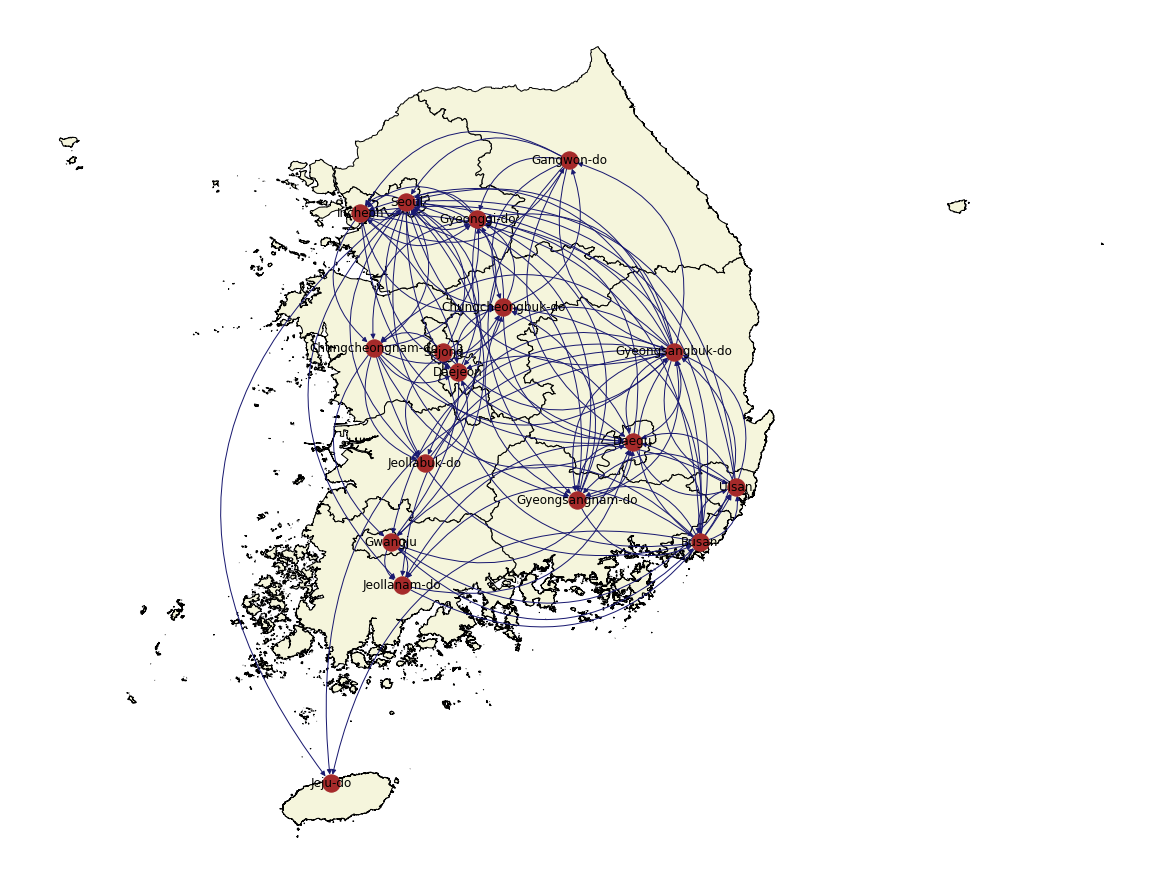

In [15]:
fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
south_korea.plot(ax=ax, color='beige', edgecolor='black')
nx.draw(G, ax=ax, with_labels=True, pos=node_position,connectionstyle='arc3, rad=0.5',edge_color='midnightblue',arrowsize=10, node_color='brown')
plt.show()

In [16]:
ebc = nx.edge_betweenness_centrality(G,weight='weight',normalized=False)

In [17]:
data_ebc = pd.DataFrame.from_dict(ebc,orient='index',columns=['EDGE BETWEENNESS CENTRALITY'])
data_ebc2 = data_ebc
data_ebc_origin = []
data_ebc_destination = []
for i,j in data_ebc2.index:
    data_ebc_origin.append(i)
    data_ebc_destination.append(j)
data_ebc2['ORIGIN'] = data_ebc_origin
data_ebc2['DESTINATION'] = data_ebc_destination
data_ebc2 = data_ebc2.reset_index(drop=True)
data_ebc2 = data_ebc2[['ORIGIN','DESTINATION','EDGE BETWEENNESS CENTRALITY']]
data_ebc2 = data_ebc2.drop(index=data_ebc2.loc[data_ebc2['EDGE BETWEENNESS CENTRALITY']==0].index)
data_ebc2 = data_ebc2.sort_values(by='EDGE BETWEENNESS CENTRALITY',ascending=False).reset_index(drop=True)
data_ebc2.head()

,ORIGIN,DESTINATION,EDGE BETWEENNESS CENTRALITY
0,Seoul,Incheon,68.0
1,Incheon,Chungcheongnam-do,52.0
2,Daegu,Gyeongsangbuk-do,43.5
3,Chungcheongnam-do,Busan,39.0
4,Busan,Gwangju,28.0


In [18]:
bc = nx.betweenness_centrality(G)

In [19]:
data_bc = pd.DataFrame.from_dict(bc,orient='index',columns=['BETWEENNESS CENTRALITY'])
data_bc2 = data_bc
data_bc_province = []
for i in data_bc.index:
    data_bc_province.append(i)
data_bc2['PROVINCE'] = data_bc_province
data_bc2 = data_bc2.reset_index(drop=True)
data_bc2 = data_bc2[['PROVINCE','BETWEENNESS CENTRALITY']]
data_bc2 = data_bc2.sort_values(by='BETWEENNESS CENTRALITY',ascending=False).reset_index(drop=True)
data_bc2.head()

,PROVINCE,BETWEENNESS CENTRALITY
0,Seoul,0.209107
1,Gyeongsangbuk-do,0.123214
2,Daegu,0.059519
3,Incheon,0.042986
4,Busan,0.035248


In [20]:
ebc_ordered = collections.OrderedDict(sorted(ebc.items()))
ebc_edge = [ebc_ordered.get(edge) for edge in G.edges()]
line_width = []
for i in ebc_edge:
    if i > 10:
        i = i/10
    else:
        i = 0
    line_width.append(i)

In [21]:
bc_ordered = collections.OrderedDict(sorted(bc.items()))
bc_node = [bc_ordered.get(node) for node in G.nodes()]
node_size = []
for i in bc_node:
    if i > 0.05:
        i = i*15000
    elif i >0:
        i = i*10000
    else:
        i = (i+0.008)*10000
    node_size.append(i)

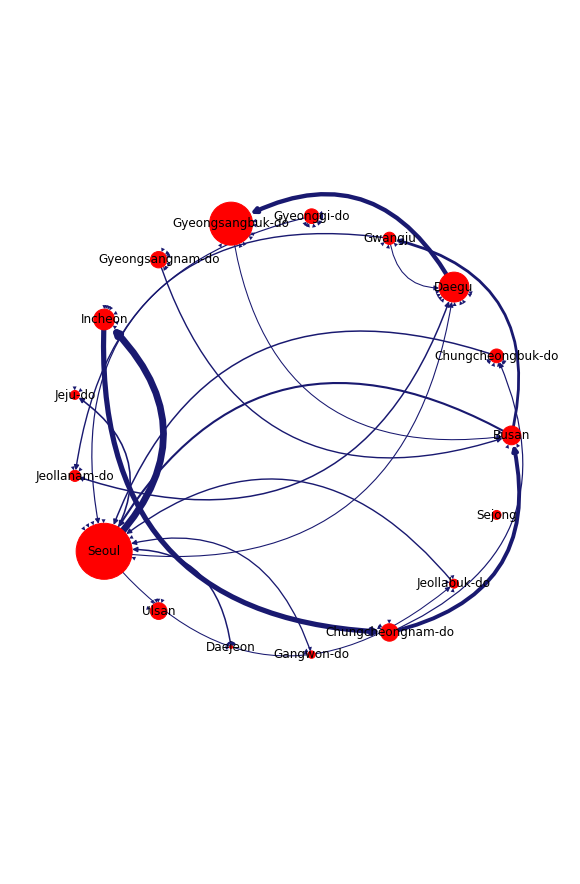

In [22]:
fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
nx.draw_circular(G, ax=ax,node_size=node_size, with_labels=True, width=line_width,connectionstyle='arc3, rad=0.5',edge_color='midnightblue',arrowsize=10, node_color='red')

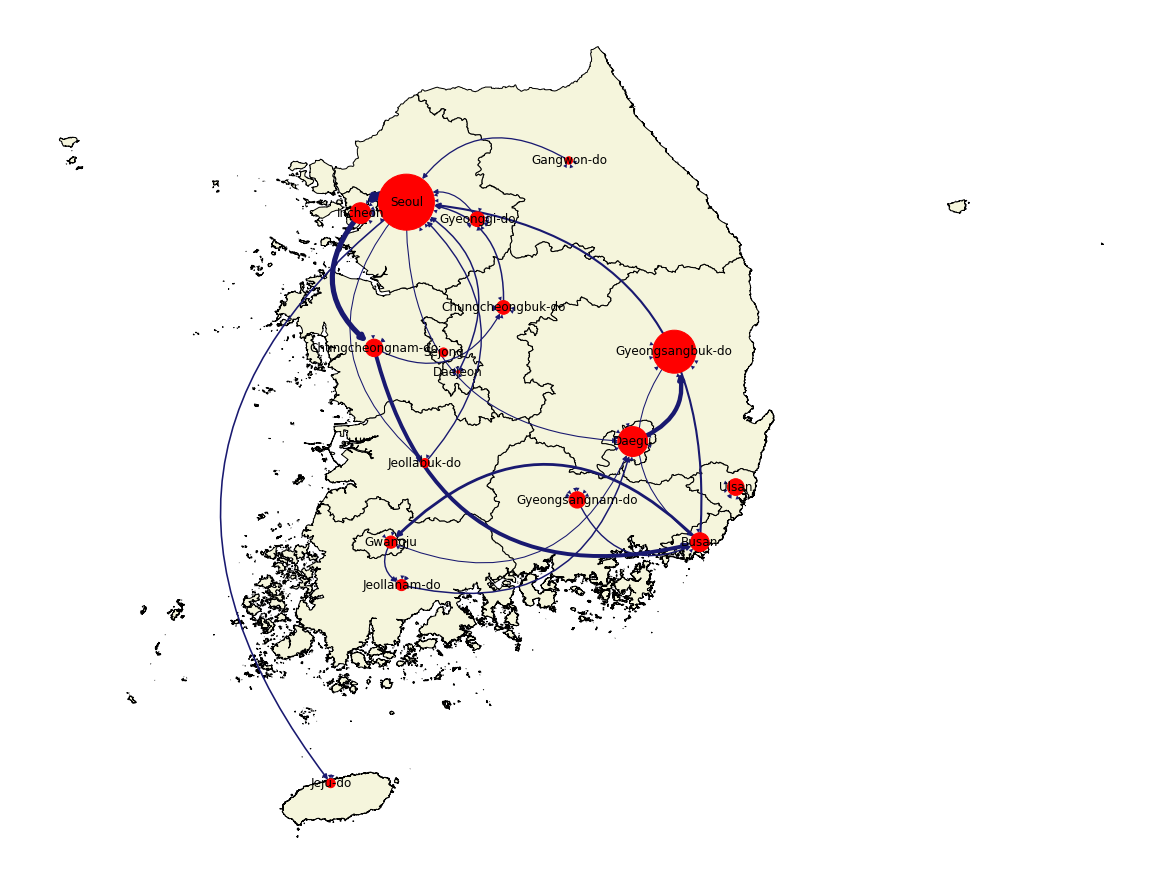

In [24]:
fig, ax = plt.subplots(figsize=(24,16))
ax.set_aspect('equal')
south_korea.plot(ax=ax, color='beige', edgecolor='black')
nx.draw(G, ax=ax, with_labels=True, width=line_width, node_size=node_size, pos=node_position, node_color='red',connectionstyle='arc3, rad=0.5',edge_color='midnightblue',arrowsize=10)
plt.show()